In [1]:
import numpy as np
import pandas as pd
import time
from pandas.api.types import is_numeric_dtype

In [2]:
df = pd.read_csv("diabetic_data.csv",sep=',', header=0, error_bad_lines=False, low_memory=False, decimal='.')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [16]:
def string_to_value(column):
    dict = {}
    k = 0
    unique = df[column].unique()
    for unique_value in unique:
        dict[unique_value] = k
        k+=1
    return dict

In [17]:
def plot_column(df,column):
    if (is_numeric_dtype(df[column]) == True):
        df.plot(y=column, use_index=True)
    else:
        dict = string_to_value(column)
        df = df.replace({column: dict})
        df.plot(y=column, use_index=True)

In [18]:
def plot_everything(df):
    i=0
    colnames = df.columns.get_values()
    colnames.tolist()
    for j in colnames:
        column_name = colnames[i]
        plot_column(df,column_name)
        i+=1

C:\Users\Macie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Macie\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


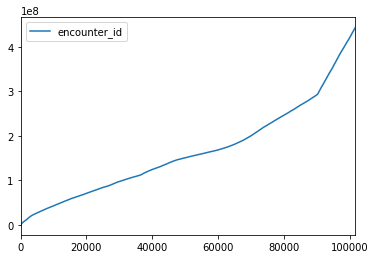

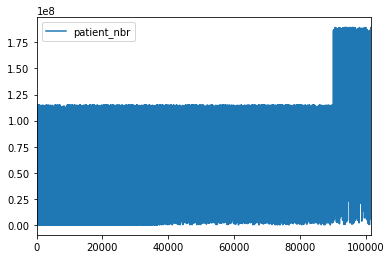

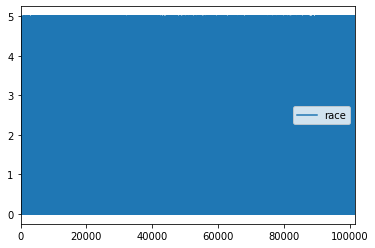

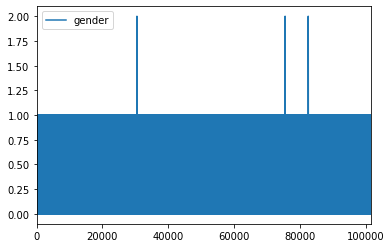

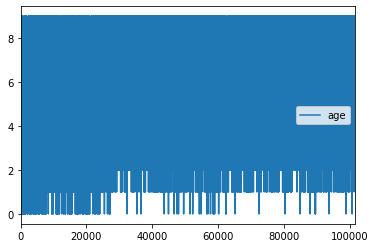

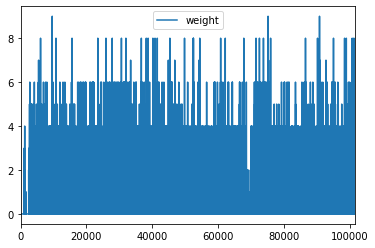

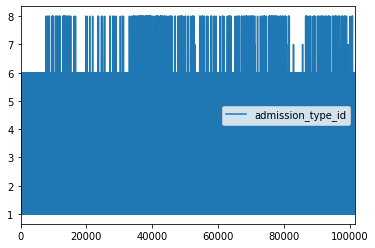

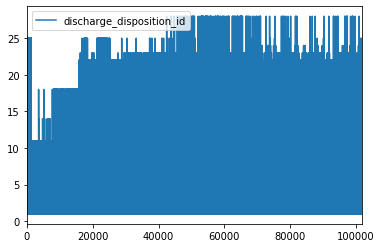

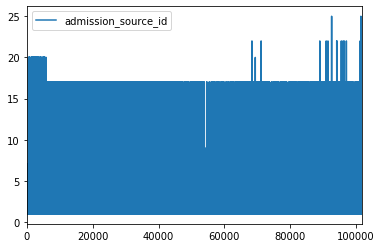

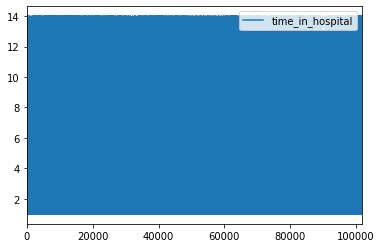

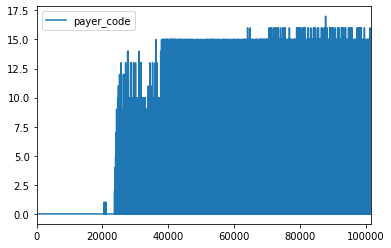

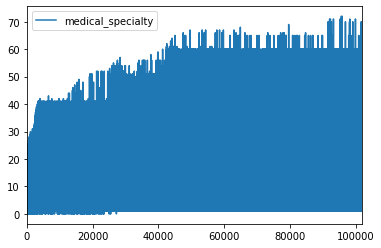

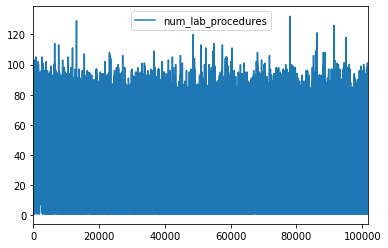

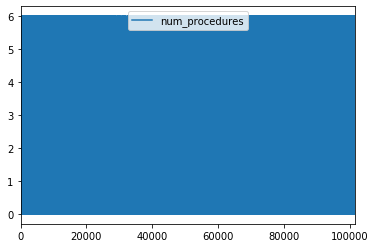

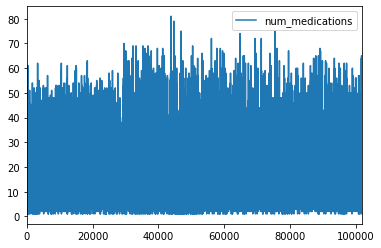

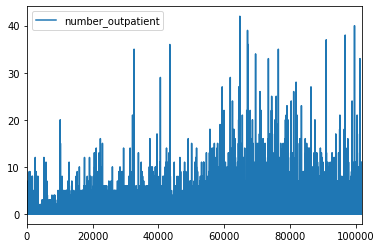

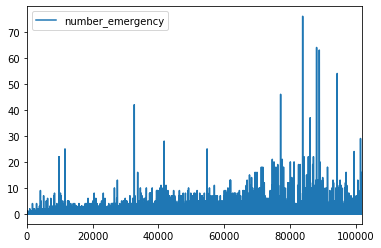

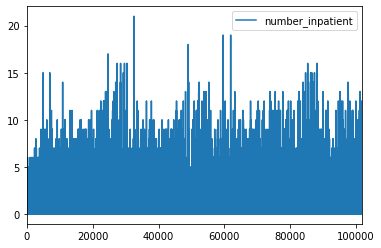

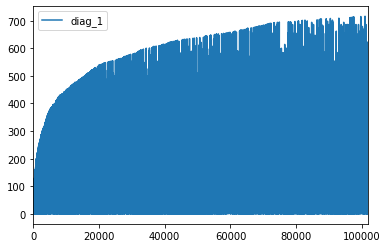

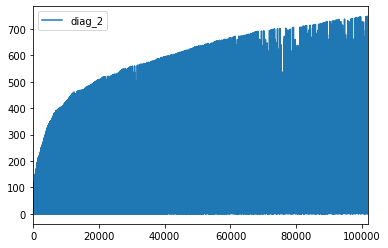

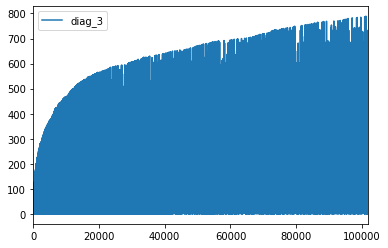

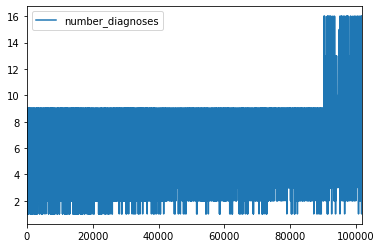

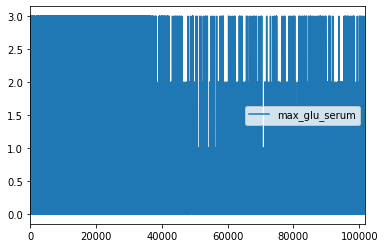

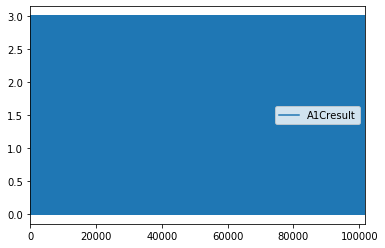

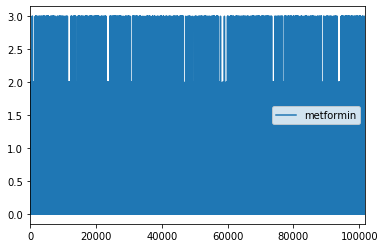

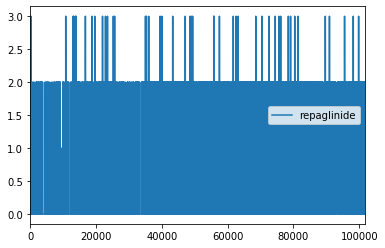

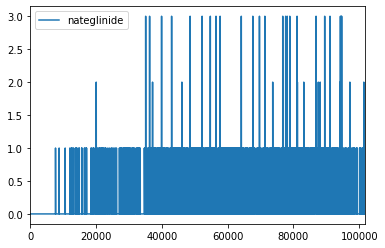

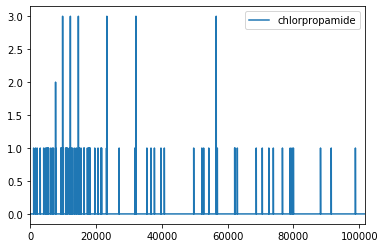

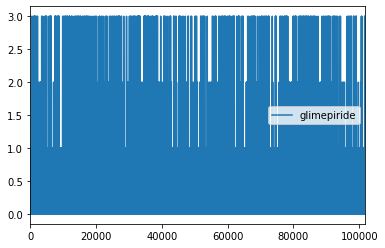

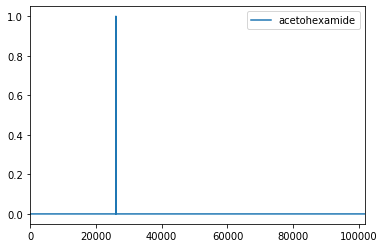

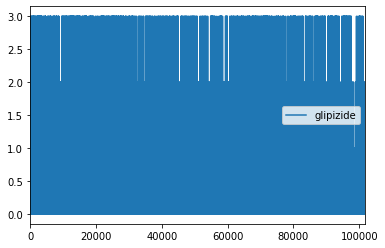

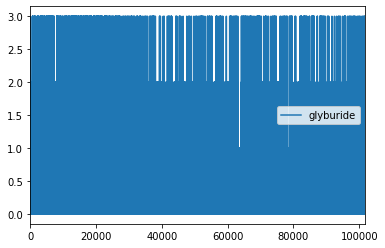

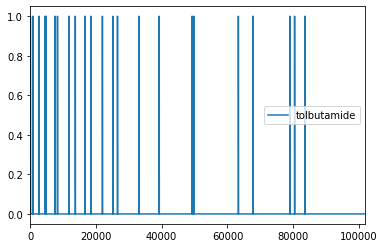

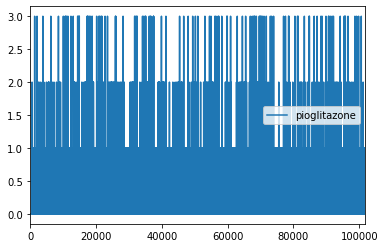

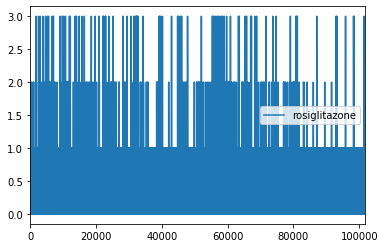

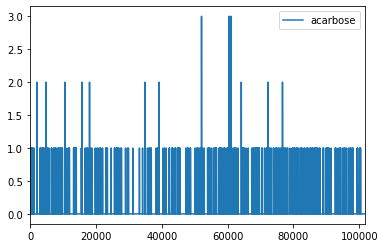

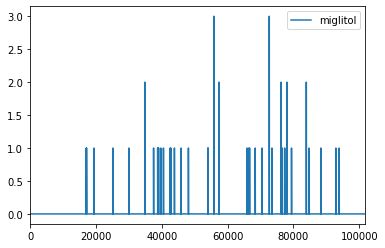

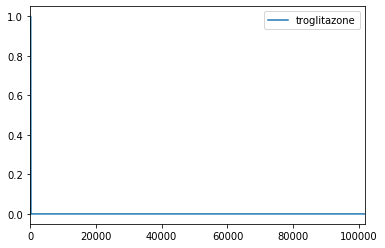

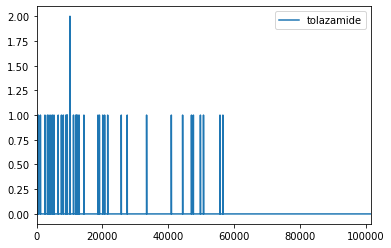

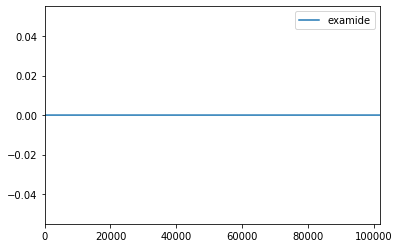

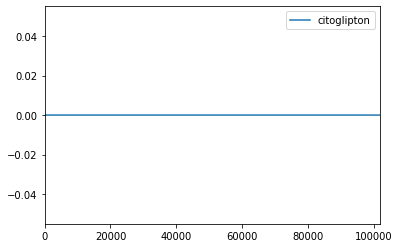

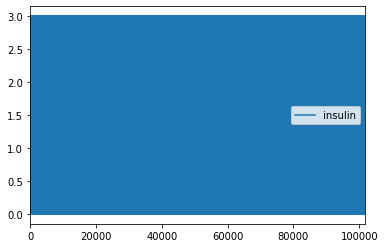

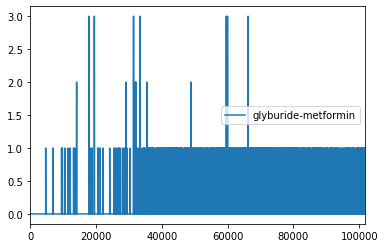

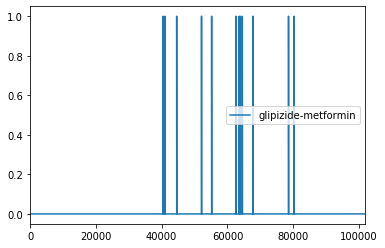

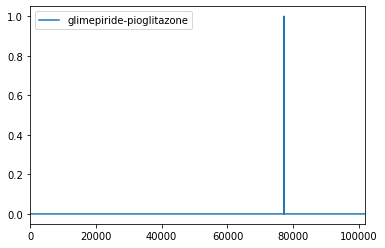

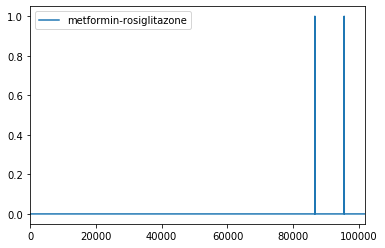

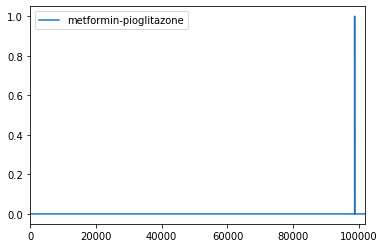

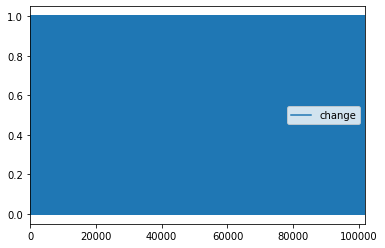

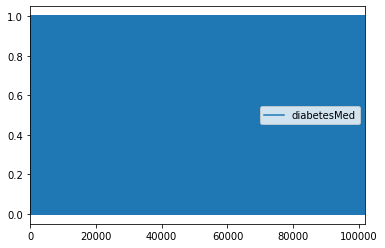

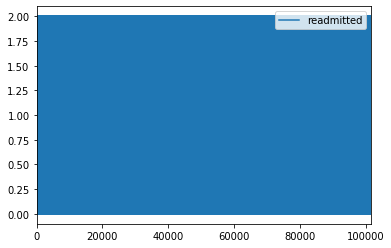

In [19]:
plot_everything(df)